# **Resolución Laboratorio #3**
**Implementación del Algoritmo de Reducción de Dimensionalidad - PCA**

**Integrantes:**

1) Francisco Javier González Alfaro GA101522

2) Francisco López Guardado LG100422

3) David Gilberto Castellanos CC202822

In [ ]:
# Importamos las librerias necesarias
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Asignamos el data set a nuestra variable y le asignamos los nombres de las columnas de acuerdo al sitio web de scikit-learn
df = pd.read_csv('https://raw.githubusercontent.com/dgca77/DataSet/main/iris.data')
nombres_col = ['longitud_sepalo','ancho_sepalo','longitud_petalo','ancho_petalo', 'clase']
df.columns = nombres_col
X_cols = ['longitud_sepalo','ancho_sepalo','longitud_petalo','ancho_petalo']

In [ ]:
# Mostramos el dataset
df.head()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
# Estadarizamos las columnas de nuestro dataset
ss = StandardScaler()
df[(X_cols)] = ss.fit_transform(df[X_cols])

# Mostramos el dataset estandarizado
df.head()

,longitud_sepalo,ancho_sepalo,longitud_petalo,ancho_petalo,clase
0,-1.148356,-0.118060,-1.353964,-1.325063,Iris-setosa
1,-1.390542,0.344859,-1.410986,-1.325063,Iris-setosa
2,-1.511636,0.113399,-1.296943,-1.325063,Iris-setosa
3,-1.027262,1.270695,-1.353964,-1.325063,Iris-setosa
4,-0.542889,1.965072,-1.182901,-1.061466,Iris-setosa


In [ ]:
# Crearemos el PCA de 2 componentes
pca2 = PCA(n_components=2, random_state=42)
pca_2 = pca2.fit_transform(df[X_cols])
pca_2[:4]

array([[-2.10795032, -0.64427554],
       [-2.38797131, -0.30583307],
       [-2.32487909, -0.56292316],
       [-2.40508635,  0.687591  ]])

In [ ]:
# Creamos un dataframe donde guardaremos el Dataframe anterior
df_2 = pd.DataFrame({'PCA1': pca_2[:,0], 'PCA2': pca_2[:,1], 'clase': df['clase']})
df_2.head()

,PCA1,PCA2,clase
0,-2.107950,-0.644276,Iris-setosa
1,-2.387971,-0.305833,Iris-setosa
2,-2.324879,-0.562923,Iris-setosa
3,-2.405086,0.687591,Iris-setosa
4,-2.083204,1.530252,Iris-setosa


In [ ]:
# Mostramos la varianza explicada de ambas variables
pca2.explained_variance_ratio_

array([0.72620033, 0.23147407])

In [ ]:
# Mostramos la varianza total
pca2.explained_variance_ratio_.sum()

0.9576744018556446

<Axes: >

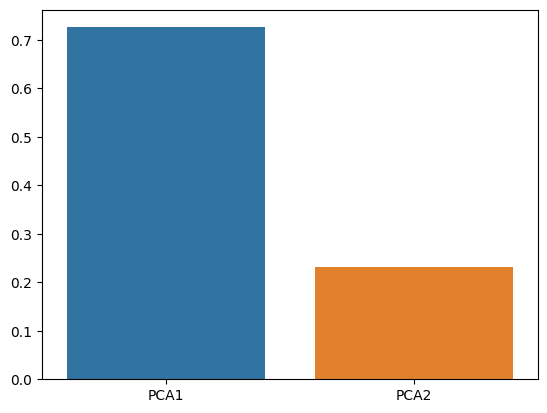

In [ ]:
# Mostramos una grafica con lo que se ha realizado
sns.barplot(x=['PCA1', 'PCA2'], y=pca2.explained_variance_ratio_)

<Axes: xlabel='PCA1', ylabel='PCA2'>

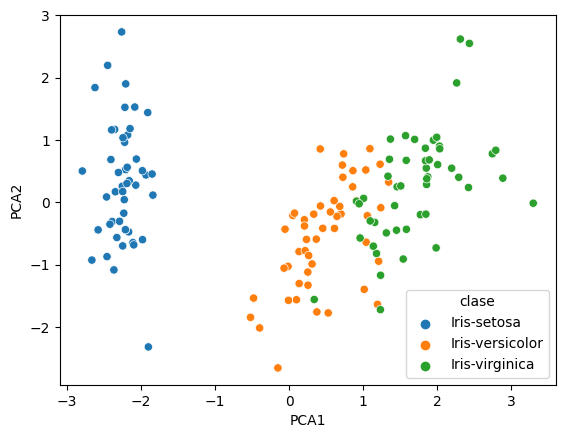

In [ ]:
# Grafica para representar el conjunto de datos realizado
sns.scatterplot(x='PCA1', y='PCA2', hue='clase', data=df_2)

In [ ]:
# Ahora crearemos el PCA de 3 componentes
pca3 = PCA(n_components=3, random_state=42)
pca_3 = pca3.fit_transform(df[X_cols])
pca_3[:4]

array([[-2.10795032, -0.64427554, -0.22876837],
       [-2.38797131, -0.30583307,  0.04967158],
       [-2.32487909, -0.56292316,  0.0971425 ],
       [-2.40508635,  0.687591  ,  0.01881853]])

In [ ]:
# Creamos un dataframe donde guardaremos el Dataframe anterior de 3 componentes
df_3 = pd.DataFrame({'PCA1': pca_3[:,0], 'PCA2': pca_3[:,1], 'PCA3': pca_3[:,2], 'clase': df['clase']})
df_3.head()

,PCA1,PCA2,PCA3,clase
0,-2.107950,-0.644276,-0.228768,Iris-setosa
1,-2.387971,-0.305833,0.049672,Iris-setosa
2,-2.324879,-0.562923,0.097142,Iris-setosa
3,-2.405086,0.687591,0.018819,Iris-setosa
4,-2.083204,1.530252,0.027757,Iris-setosa


In [ ]:
# Mostramos la varianza explicada de ambas variables
pca3.explained_variance_ratio_

array([0.72620033, 0.23147407, 0.03711516])

In [ ]:
# Mostramos la varianza total
pca3.explained_variance_ratio_.sum()

0.9947895575014899

<Axes: >

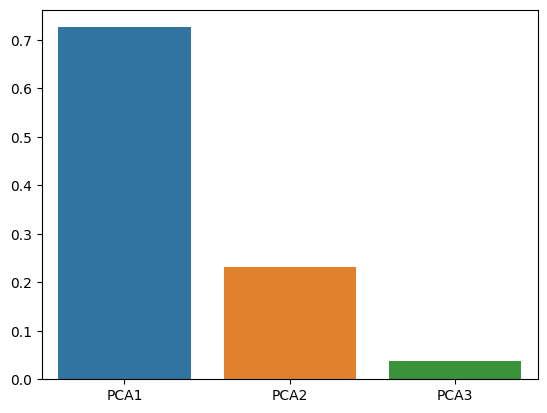

In [ ]:
# Mostramos la grafica con los 3 componentes
sns.barplot(x=['PCA1', 'PCA2', 'PCA3'], y=pca3.explained_variance_ratio_)

<function matplotlib.pyplot.show(close=None, block=None)>

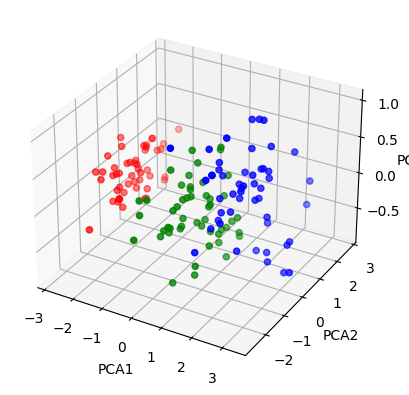

In [ ]:
# Graficaremos en 3 dimensiones para ver los 3 componentes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df_3['PCA1']
y = df_3['PCA2']
z = df_3['PCA3']
col = df_3['clase'].map({'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'})
ax.scatter(x,y,z, c=col, marker='o')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show

**Analisis**

En principio se tiene un conjunto de datos multidimensional y se ha reducido en nuestro caso, a 2 y 3 dimensiones, utilizando la reduccion de dimensionalidad. Para este ejemplo propuesto, se ha utilizado 'PCA' para tener un problema menos complejo con menos variables y que demuestren el porcentaje de la varianza relativamente alto.

El objetivo principal de este algoritmo es transformar un conjunto de variables correlacionadas en un conjunto más pequeño de variables no correlacionadas, llamadas componentes principales.

Esto puede servir para analizar de mejor manera nuestros datos, sin que se pierda la efectividad de nuestro dataset.